<h1 style='text-align: center;'> Covarianza y Correlación </h1> 

In [1]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import linregress
from IPython.display import display, Markdown

In [2]:
# Lectura del dataset
data_forest_fires = pd.read_csv("./datasets/forestfires.csv")
data_forest_fires.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Ejercicio 1
Dado el conjunto de datos Forest-Fires-Data (AVAC), realice el cálculo de la covarianza empleando Excel o Python. Deberá considerar las variables: **viento (wind)** y **humedad relativa (rH)**. La descripción del archivo se encuentra en: Forest-Fires-Description

Deberá indicar la conclusión a la que ha llegado luego de haber obtenido el valor y graficar el diagrama de 
dispersión.

In [3]:
# Funciones
def calculate_covariance(x, y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return round(cov,3)

def generate_chart_scatter(x,y,title,xlabel,ylabel):
    fig = px.scatter(x=x, y=y)
    fig.update_layout(title_text=title, title_x=0.5)
    fig.update_layout(
        xaxis_title=xlabel,
        yaxis_title=ylabel
    )
    fig.show('png')

**Covarianza entre wind y RH es =** 2.029

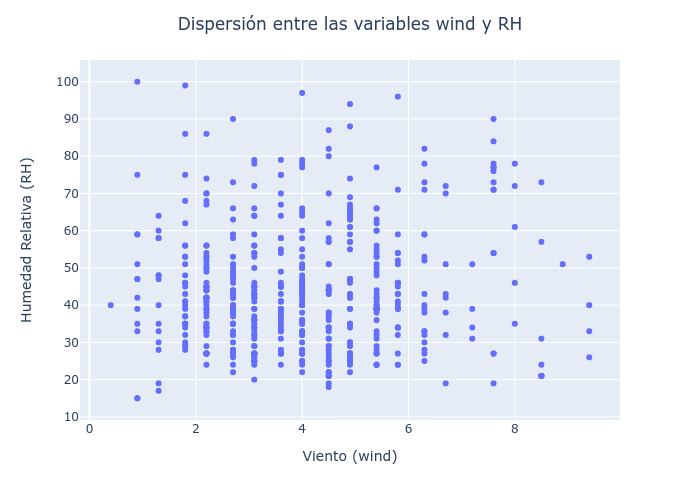

In [4]:
# Obtencion de los valores correspondientes a la columnas wind y RH
x = np.array(data_forest_fires['wind'])
y = np.array(data_forest_fires['RH'])

# Calculo de covarianza y gráfica de dispersión
display(Markdown(f'**Covarianza entre wind y RH es =** {calculate_covariance(x,y)}'))
generate_chart_scatter(x,y, 'Dispersión entre las variables wind y RH', 'Viento (wind)', 'Humedad Relativa (RH)')

### Conclusiones
1. En base al resultado de la covarianza 2.029 entre las variables **wind** y **RH**, se concluye que existe una relación directa o positiva. Lo que significaria que al incrementar la variable **wind**, tambien incrementara los valores de la variable **RH**, sin embargo al observar el gráfico resultate, obsevamos que el concepto de una covarianza positiva no se esta aplicando para todos los casos.

### Ejercicio 2

Dado el conjunto de datos Forest-Fires-Data (AVAC), realice el cálculo del coeficiente de correllación lineal de Pearson empleando Excel o Python. Deberá considerar las variables: **viento (wind)** y **humedad relativa (rH)**.

Deberá calcular también la regresión lineal e indicar la conclusión a la que ha llegado luego de haber obtenido el valor.

In [5]:
# Funciones
def calculate_pearsons_coefficient(x, y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    cov = sum((a - mean_x) * (b - mean_y) for (a,b) in zip(x,y)) / len(x)
    sub_x = (sum((a - mean_x)**2 for a in x)/len(x))**0.5
    sub_y = (sum((b - mean_y)**2 for b in y)/len(y))**0.5
    return round(cov/(sub_x*sub_y),3)

def generate_chart_scatter(x,y,trendline,title,xlabel,ylabel):
    fig = px.scatter(x=x, y=y, trendline=trendline)
    fig.data[1].line.color = 'red'
    fig.update_layout(title_text=title, title_x=0.5)
    fig.update_layout(
        xaxis_title=xlabel,
        yaxis_title=ylabel
    )
    fig.show('png')

**La correlación lineal de Pearson entre wind y RH es =** 0.069

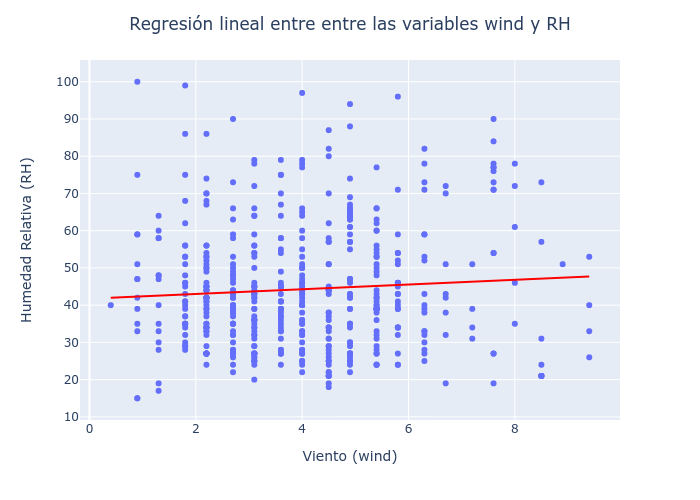

In [6]:
# Obtencion de los valores correspondientes a la columnas wind y RH
x = np.array(data_forest_fires['wind'])
y = np.array(data_forest_fires['RH'])

# Calculo de correlación lineal de Pearson y regresión lineal
cov_pearsons = calculate_pearsons_coefficient(x,y)
display(Markdown(f'**La correlación lineal de Pearson entre wind y RH es =** {cov_pearsons}'))

generate_chart_scatter(x,y,'ols',
                       'Regresión lineal entre entre las variables wind y RH', 
                       'Viento (wind)', 'Humedad Relativa (RH)')

### Conclusiones
1. En base al resultado de la correlación lineal de 0.069 y el gráfico de la regresión lineal se puede concluir que existe una correlación positiva, pero debil a la vez, ya que se acerca máss a 0 que a 1. Mientrastanto en el gráfico podemos observar que mientras la variable **wind** crece, lo hara de igual manera la variable **RH**, por lo que no se aprecia una relación lineal clara entre estas variables.